<a href="https://colab.research.google.com/github/Shai-vn/Social-Service-2023/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de sentimientos de tweets acerca de ChatGPT

Se explorarán diferentes técnicas y aprendizajes para el procesamiento del lenguaje natural.

In [ ]:
import pandas as pd
tweets_df = pd.read_csv('/content/drive/MyDrive/SentimentalAnalysis_SS/Data/Preprocessing/tweets_with_stemming.csv')

In [ ]:
tweets_df.head()

,tweet,tokenized_tweets,tweets_stemming
0,student code heavily via python instead usingf...,"['student', 'code', 'heavily', 'via', 'python'...","['student', 'code', 'heavili', 'via', 'python'..."
1,every time play around prompt injection come a...,"['every', 'time', 'play', 'around', 'prompt', ...","['everi', 'time', 'play', 'around', 'prompt', ..."
2,curious decline usage stackoverflow rise,"['curious', 'decline', 'usage', 'stackoverflow...","['curiou', 'declin', 'usag', 'stackoverflow', ..."
3,people buried use ofwill cause cause immediate...,"['people', 'buried', 'use', 'ofwill', 'cause',...","['peopl', 'buri', 'use', 'ofwil', 'caus', 'cau..."
4,two friends currently debate three us nearly e...,"['two', 'friends', 'currently', 'debate', 'thr...","['two', 'friend', 'current', 'debat', 'three',..."


In [ ]:
!pip install -U textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


##TextBlob



In [ ]:
from textblob import TextBlob

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [ ]:
tweets_df.head()

,tweet,tokenized_tweets,tweets_stemming,cluster
0,student code heavily via python instead usingf...,"['student', 'code', 'heavily', 'via', 'python'...","['student', 'code', 'heavili', 'via', 'python'...",0
1,every time play around prompt injection come a...,"['every', 'time', 'play', 'around', 'prompt', ...","['everi', 'time', 'play', 'around', 'prompt', ...",0
2,curious decline usage stackoverflow rise,"['curious', 'decline', 'usage', 'stackoverflow...","['curiou', 'declin', 'usag', 'stackoverflow', ...",0
3,people buried use ofwill cause cause immediate...,"['people', 'buried', 'use', 'ofwill', 'cause',...","['peopl', 'buri', 'use', 'ofwil', 'caus', 'cau...",1
4,two friends currently debate three us nearly e...,"['two', 'friends', 'currently', 'debate', 'thr...","['two', 'friend', 'current', 'debat', 'three',...",0


In [ ]:
tweets_df['tweet_polarity'] = tweets_df['tweets_stemming'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)

In [ ]:
tweets_df.head()

,tweet,tokenized_tweets,tweets_stemming,cluster,tweet_polarity
0,student code heavily via python instead usingf...,"['student', 'code', 'heavily', 'via', 'python'...","['student', 'code', 'heavili', 'via', 'python'...",0,0.000
1,every time play around prompt injection come a...,"['every', 'time', 'play', 'around', 'prompt', ...","['everi', 'time', 'play', 'around', 'prompt', ...",0,-0.125
2,curious decline usage stackoverflow rise,"['curious', 'decline', 'usage', 'stackoverflow...","['curiou', 'declin', 'usag', 'stackoverflow', ...",0,0.000
3,people buried use ofwill cause cause immediate...,"['people', 'buried', 'use', 'ofwill', 'cause',...","['peopl', 'buri', 'use', 'ofwil', 'caus', 'cau...",1,0.000
4,two friends currently debate three us nearly e...,"['two', 'friends', 'currently', 'debate', 'thr...","['two', 'friend', 'current', 'debat', 'three',...",0,0.000


In [ ]:
def getAnalysis(score):
  if score < 0:
      return "Negative"
  elif score == 0:
      return "Neutral"
  else:
      return "Positive"

In [ ]:
tweets_df['tweet_sentiment'] = tweets_df['tweet_polarity'].apply(getAnalysis)

In [ ]:
count_sentiments = tweets_df['tweet_sentiment'].value_counts()

In [ ]:
count_sentiments['Neutral']

4740

In [ ]:
total_tweets = len(tweets_df)

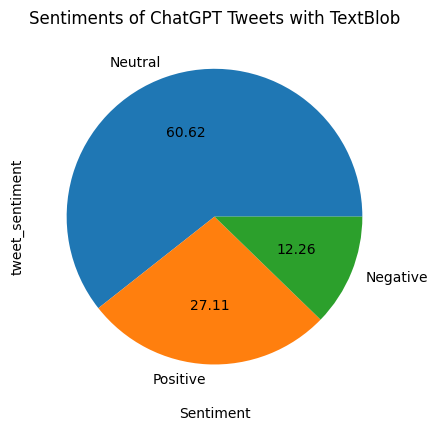

In [ ]:
tweets_df['tweet_sentiment'].value_counts().plot(kind='pie', autopct='%1.2f')
plt.xlabel('Sentiment')
plt.title('Sentiments of ChatGPT Tweets with TextBlob')
plt.show()


In [ ]:
print(f"Porcentaje de tweets positvos sobre ChatGPT {round(count_sentiments['Positive']*100/total_tweets)}% ")
print(f"Porcentaje de tweets negativos sobre ChatGPT {round(count_sentiments['Negative']*100/total_tweets)}% ")
print(f"Porcentaje de tweets neutros sobre ChatGPT {round(count_sentiments['Neutral']*100/total_tweets)}% ")

Porcentaje de tweets positvos sobre ChatGPT 27% 
Porcentaje de tweets negativos sobre ChatGPT 12% 
Porcentaje de tweets neutros sobre ChatGPT 61% 


##Vader
Valence Aware Dictionary and Sentiment Reasoner.

In [ ]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
tweets_polarityVader = tweets_df['tokenized_tweets'].apply(lambda text: analyzer.polarity_scores(text))

In [ ]:
tweets_polarityVader = pd.DataFrame(tweets_polarityVader)

In [ ]:
tweets_polarityVader

,tokenized_tweets
0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'comp..."
2,"{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'comp..."
3,"{'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'comp..."
4,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'comp..."
...,...
7814,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp..."
7815,"{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'comp..."
7816,"{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'comp..."
7817,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
positive sentiment : (compound score >= 0.05)
neutral sentiment : (compound score > -0.05) and (compound score < 0.05)
negative sentiment : (compound score <= -0.05)

In [ ]:
#Extraer 'compound'
key = 'compound'

# Función para extraer el valor de compound
def get_compound(polarities):
    return polarities.get(key, None)

# Aplicar la función a la columna 'tweet_vaderPolarity'
tweets_df['tweet_polarity_vader'] = tweets_polarityVader['tokenized_tweets'].apply(get_compound)

In [ ]:
tweets_df.head()

,tweet,tokenized_tweets,tweets_stemming,cluster,tweet_polarity,tweet_sentiment,tweet_polarity_vader
0,student code heavily via python instead usingf...,"['student', 'code', 'heavily', 'via', 'python'...","['student', 'code', 'heavili', 'via', 'python'...",0,0.000,Neutral,0.0000
1,every time play around prompt injection come a...,"['every', 'time', 'play', 'around', 'prompt', ...","['everi', 'time', 'play', 'around', 'prompt', ...",0,-0.125,Negative,0.5106
2,curious decline usage stackoverflow rise,"['curious', 'decline', 'usage', 'stackoverflow...","['curiou', 'declin', 'usag', 'stackoverflow', ...",0,0.000,Neutral,0.3182
3,people buried use ofwill cause cause immediate...,"['people', 'buried', 'use', 'ofwill', 'cause',...","['peopl', 'buri', 'use', 'ofwil', 'caus', 'cau...",1,0.000,Neutral,-0.0772
4,two friends currently debate three us nearly e...,"['two', 'friends', 'currently', 'debate', 'thr...","['two', 'friend', 'current', 'debat', 'three',...",0,0.000,Neutral,0.4767


In [ ]:
def getVaderSentiment(compound):
  if compound >=0.5:
      return "Positive"
  elif compound <=-0.5:
      return "Negative"
  else:
      return "Neutral"

In [ ]:
tweets_df['tweet_sentiment_vader'] = tweets_df['tweet_polarity_vader'].apply(getVaderSentiment)

In [ ]:
tweets_df['tweet_sentiment_vader'].value_counts()

Neutral     6052
Positive    1366
Negative     401
Name: tweet_sentiment_vader, dtype: int64

In [ ]:
tweets_df.head()

,tweet,tokenized_tweets,tweets_stemming,tweet_subjectivity,tweet_polarity,tweet_sentiment,tweet_polarity_vader,tweet_sentiment_vader
0,student code heavily via python instead usingf...,"['student', 'code', 'heavily', 'via', 'python'...","['student', 'code', 'heavili', 'via', 'python'...",0.000,0.000,Neutral,0.0000,Neutral
1,every time play around prompt injection come a...,"['every', 'time', 'play', 'around', 'prompt', ...","['everi', 'time', 'play', 'around', 'prompt', ...",0.375,-0.125,Negative,0.3400,Neutral
2,curious decline usage stackoverflow rise,"['curious', 'decline', 'usage', 'stackoverflow...","['curiou', 'declin', 'usag', 'stackoverflow', ...",0.000,0.000,Neutral,0.0000,Neutral
3,people buried use ofwill cause cause immediate...,"['people', 'buried', 'use', 'ofwill', 'cause',...","['peopl', 'buri', 'use', 'ofwil', 'caus', 'cau...",0.000,0.000,Neutral,0.0000,Neutral
4,two friends currently debate three us nearly e...,"['two', 'friends', 'currently', 'debate', 'thr...","['two', 'friend', 'current', 'debat', 'three',...",0.400,0.000,Neutral,0.4939,Neutral


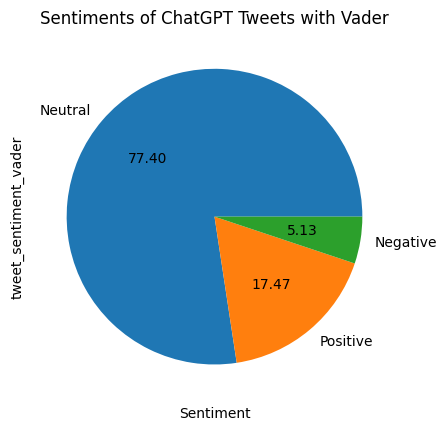

In [ ]:
tweets_df['tweet_sentiment_vader'].value_counts().plot(kind='pie', autopct='%1.2f')
plt.xlabel('Sentiment')
plt.title('Sentiments of ChatGPT Tweets with Vader')
plt.show()

#Elbow

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
# Vectorización de tweets usando TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(tweets_df['tokenized_tweets'])

In [ ]:
# PCA for dimensionality reduction
pca = PCA(n_components=100)  # Adjust the number of components based on your requirements
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

In [ ]:
# Aplicar K-means con diferentes valores de k
inercias = []
k_values = range(1, 11)  # Prueba con k desde 1 hasta 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=48) #73
    kmeans.fit(X)
    inercias.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000, stop_words='english')
# Fit and transform the complaints text to create embeddings
tfidf_matrix = tfidf_vectorizer.fit_transform(tweets_df['tweets_stemming'])
tfidf_matrix.shape

(7819, 1000)

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA and reduce dimensionality to 2 components
pca = PCA(n_components=2)
reduced_tfidf = pca.fit_transform(tfidf_matrix.toarray())

reduced_tfidf.shape

(7819, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

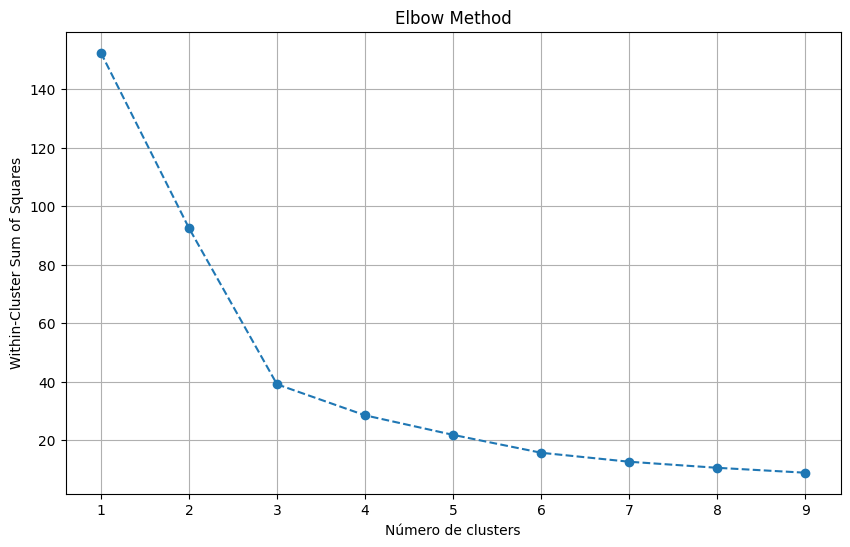

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Determinando el numero óptimo de clusters utilizando el método de Elbow

wcss = []
cluster_range = range(1, 10)  # probando de 1-10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_tfidf)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


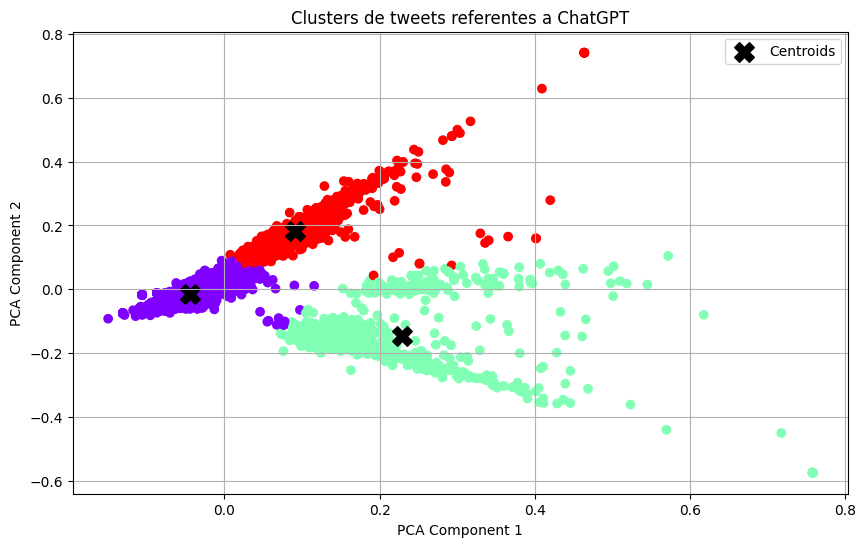

In [ ]:
# Usando KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_tfidf)
tweets_df['cluster'] = clusters
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_tfidf[:, 0], reduced_tfidf[:, 1], c=clusters, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters de tweets referentes a ChatGPT')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
tweets_df

,tweet,tokenized_tweets,tweets_stemming,cluster,tweet_polarity,tweet_sentiment,tweet_polarity_vader,tweet_sentiment_vader
0,student code heavily via python instead usingf...,"['student', 'code', 'heavily', 'via', 'python'...","['student', 'code', 'heavili', 'via', 'python'...",0,0.000,Neutral,0.0000,Neutral
1,every time play around prompt injection come a...,"['every', 'time', 'play', 'around', 'prompt', ...","['everi', 'time', 'play', 'around', 'prompt', ...",0,-0.125,Negative,0.5106,Positive
2,curious decline usage stackoverflow rise,"['curious', 'decline', 'usage', 'stackoverflow...","['curiou', 'declin', 'usag', 'stackoverflow', ...",0,0.000,Neutral,0.3182,Neutral
3,people buried use ofwill cause cause immediate...,"['people', 'buried', 'use', 'ofwill', 'cause',...","['peopl', 'buri', 'use', 'ofwil', 'caus', 'cau...",1,0.000,Neutral,-0.0772,Neutral
4,two friends currently debate three us nearly e...,"['two', 'friends', 'currently', 'debate', 'thr...","['two', 'friend', 'current', 'debat', 'three',...",0,0.000,Neutral,0.4767,Neutral
...,...,...,...,...,...,...,...,...
7814,face therobot know robot looks like,"['face', 'therobot', 'know', 'robot', 'looks',...","['face', 'therobot', 'know', 'robot', 'look', ...",0,0.000,Neutral,0.3612,Neutral
7815,friend aled,"['friend', 'aled']","['friend', 'ale']",0,0.000,Neutral,0.4939,Neutral
7816,industry experts agents innovators share knowl...,"['industry', 'experts', 'agents', 'innovators'...","['industri', 'expert', 'agent', 'innov', 'shar...",0,0.000,Neutral,0.7506,Positive
7817,man sues openai claiming hallucination said em...,"['man', 'sues', 'openai', 'claiming', 'halluci...","['man', 'sue', 'openai', 'claim', 'hallucin', ...",0,0.000,Neutral,0.0000,Neutral


In [ ]:
# Calcular el coeficiente de silueta para evaluar la calidad de los clusters
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(tfidf_matrix, tweets_df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.01861931005077997


In [ ]:
# Visualizar textos en cada cluster

for cluster in range(3):
    print(f"Cluster {cluster}:\n")
    cluster_samples = tweets_df[tweets_df['cluster'] == cluster].sample(5)['tweets_stemming']

    for i, text in enumerate(cluster_samples, start=1):
        print(f"Example {i}:\n{text}\n")

Cluster 0:

Example 1:
['black', 'mirror', 'creator', 'taskedto', 'write', 'episod', 'failur']

Example 2:
['lawyer', 'usedfac', 'penalti', 'made', 'citat']

Example 3:
['expert', 'helper']

Example 4:
['worth', 'note', 'scientif', 'model', 'simplif', 'realiti', 'alway', 'subject', 'refinem']

Example 5:
['ye', 'pleas', 'send']

Cluster 1:

Example 1:
['pain', 'learn', 'noth', 'use', 'actual', 'victori', 'honestli', 'rea']

Example 2:
['exactli', 'use', 'reinforc', 'new', 'knowledg', 'acquir', 'realli', 'helpfu']

Example 3:
['friend', 'use', 'help', 'tone', 'email', 'worri', 'someth', 'sound', 'confrontati']

Example 4:
['student', 'reluct', 'use', 'find', 'question']

Example 5:
['use', 'everi', 'day', 'month', 'hidden', 'gem', 'chang', 'life', 'diana', 'dovgopol']

Cluster 2:

Example 1:
['ai', 'ai', 'realli', 'replac', 'human', 'ingenu']

Example 2:
['one', 'area', 'think', 'appl', 'miss', 'embrac', 'ai', 'siri', 'noticeabl']

Example 3:
['era', 'ai', 'produc', 'content', 'written'

In [ ]:
tweets_df.groupby('cluster')['tweet_sentiment'].value_counts()

cluster  tweet_sentiment
0        Neutral            3632
         Positive           1611
         Negative            732
1        Neutral             445
         Positive            206
         Negative             77
2        Neutral             663
         Positive            303
         Negative            150
Name: tweet_sentiment, dtype: int64

In [ ]:
tweets_df.groupby('cluster')['tweet_sentiment_vader'].value_counts()

cluster  tweet_sentiment_vader
0        Neutral                  4639
         Positive                 1015
         Negative                  321
1        Neutral                   550
         Positive                  150
         Negative                   28
2        Neutral                   863
         Positive                  201
         Negative                   52
Name: tweet_sentiment_vader, dtype: int64